In [3]:
%load_ext autoreload
%autoreload 2
from config import df_rb_ratings, df_ba_ratings
from src.models.seasonality_analysis import *
from src.models.change_in_rating_distribution_mathplotlib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
plot_and_head_average_rating_per_month(df_rb_ratings)
plot_beer_style_ranking_by_amount(df_rb_ratings, df_rb_ratings['style'].unique())
plot_beer_style_ranking_by_amount_subplot(df_rb_ratings, df_rb_ratings['style'].unique())
plot_beer_style_ranking_by_avg_score(df_rb_ratings)


Average rating per month: fmonth     6.50000
rating    3.28571
dtype: float64 
 Stdev of average rating per month: fmonth     3.605551
rating    0.019627
dtype: float64
We lost 169 rows by filtering out styles with less than 500 reviews.
We lost 169 rows by filtering out styles with less than 500 reviews.
We lost 169 rows by filtering out styles with less than 500 reviews.


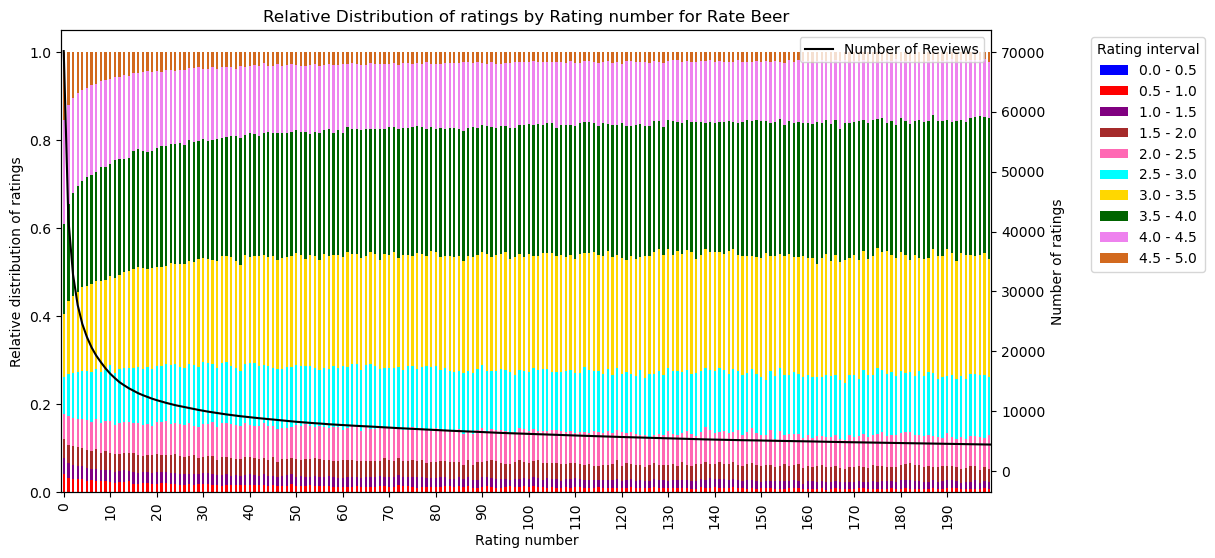

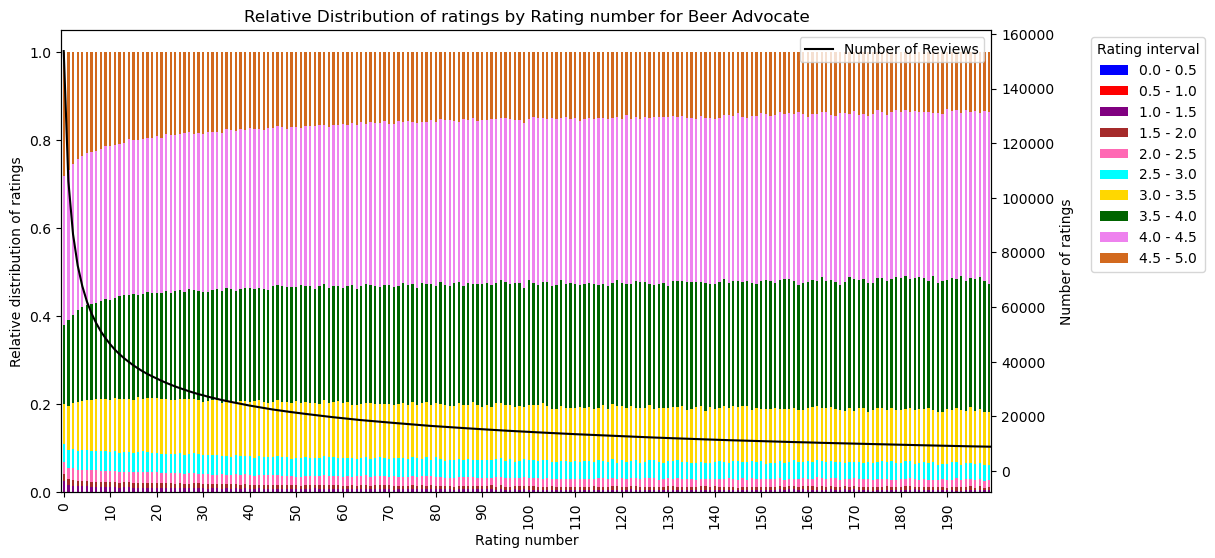

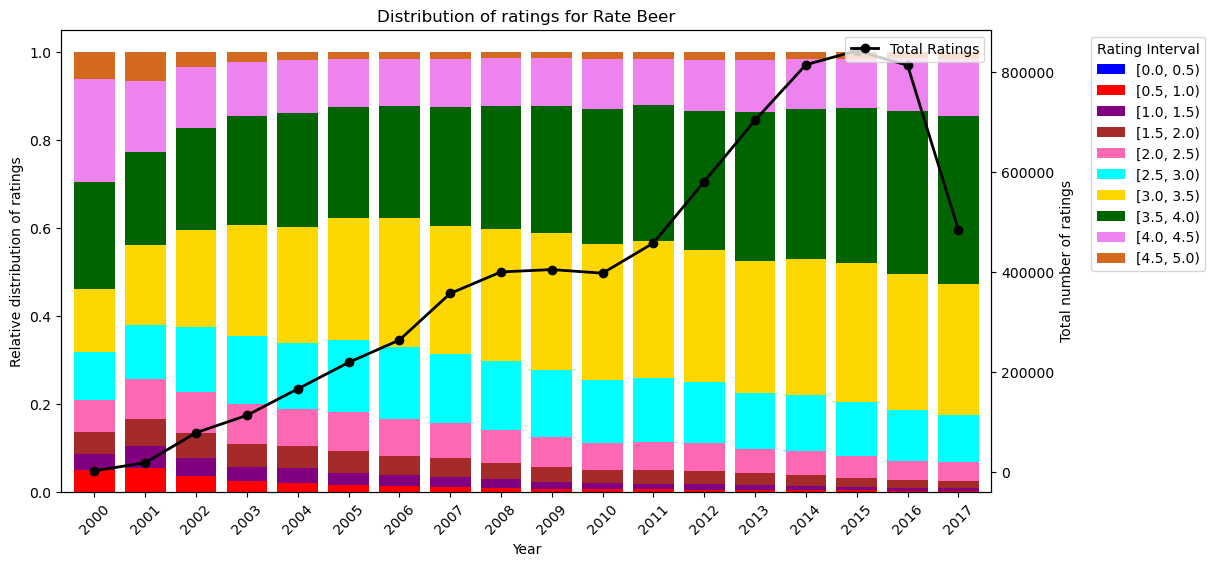

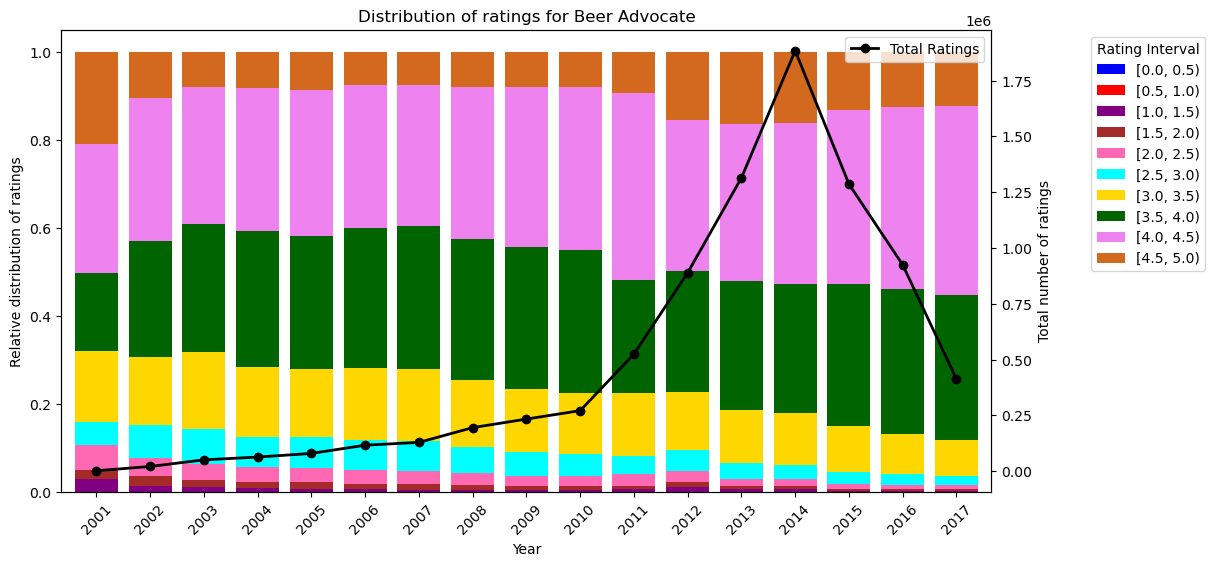

In [5]:
rating_evolution_with_rating_number(df_rb_ratings, 'Rate Beer', 'src/plots/imgs/rating_evolution_with_rating_number_Rate_Beer.png')
rating_evolution_with_rating_number(df_ba_ratings, 'Beer Advocate', 'src/plots/imgs/rating_evolution_with_rating_number_Beer_Advocate.png')
rating_evolution_over_time(df_rb_ratings, 'Rate Beer', 'src/plots/imgs/rating_evolution_over_time_Rate_Beer.png')
rating_evolution_over_time(df_ba_ratings, 'Beer Advocate', 'src/plots/imgs/rating_evolution_over_time_Beer_Advocate.png')


### Testing area for the map plot size

In [6]:
from config import df_ba_ratings, df_rb_ratings
from src.models.seasonality_analysis import *
from src.models.foreign_beer import *
from src.models.experience_words import *
from src.data.some_dataloader import *

In [7]:
df_ba_users, df_rb_users = load_user_data()

FileNotFoundError: [Errno 2] No such file or directory: 'src/data/BeerAdvocate/users.csv'

In [ ]:
df_brew = load_brewery_data(brewery_path="src/data/RateBeer/breweries.csv")

In [ ]:
df_ba_ratings_wo_text = load_rating_wo_text("src/data/BeerAdvocate/BA_ratings.csv")

df_ba_ratings_w_text = df_ba_ratings
df_rb_ratings_w_text = df_rb_ratings

In [ ]:
df_rb_users_ratings_us_only, df_ba_users_ratings_us_only = prepare_datasets(df_rb_users, df_ba_users, df_rb_ratings_w_text, df_ba_ratings_w_text)

Number of ratings from US from BeerAdvocate: 7303870
Number of ratings from US from RateBeer: 352157


In [ ]:
# there are some duplicates in the two datasets
df_rb_users_ratings_us_only = filter_usa_duplicates(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, ["style", "brewery_name", "abv", "text"])

Number of duplicates:  317982


In [ ]:
df_rb_users_ratings_us_only = df_rb_users_ratings_us_only.drop(columns=["text"])
df_ba_users_ratings_us_only = df_ba_users_ratings_us_only.drop(columns=["text"])

In [ ]:
df_ba_brew = load_brewery_data(brewery_path="src/data/BeerAdvocate/breweries.csv")

In [ ]:
df_us_only = merge_with_brewery(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, df_brew, df_ba_brew)

Number of ratings from US: 7332710


In [ ]:
df_us_only = avg_ratings_us(df_us_only)

Avg rating for US beer: 3.9113082983029344
Avg rating for non-US beer: 3.800977039382433


In [ ]:
avg_ratings_per_location = avg_ratings_per_location_us(df_us_only)

In [ ]:
plot_avg_ratings_map(avg_ratings_per_location, False, True)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107


In [ ]:
plot_avg_ratings_map(avg_ratings_per_location, True, True)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107


In [ ]:
def plot_avg_ratings_map_tests(avg_ratings_per_location, save=True):
    """
    Plots an interactive map of the USA showing the difference in average ratings by state.
    The color intensity reflects the difference value, and hovering over a state displays its name and value.

    :param save: whether we want to save or show the graphic
    :param avg_ratings_per_location: DataFrame containing states and the difference in ratings.
    :return: Nothing (plots an interactive map).
    """
    # Reset index to ensure "user_location" is a column
    avg_ratings_per_location = avg_ratings_per_location.reset_index()

    print(avg_ratings_per_location.head())

    # Ensure the column names are meaningful for the map
    avg_ratings_per_location.rename(
        columns={"user_location": "State", "Difference": "Rating Difference"},
        inplace=True,
    )

    avg_ratings_per_location["State"] = avg_ratings_per_location["State"].map(
        state_name_to_abbreviation
    )

    print(avg_ratings_per_location.head())

    # Use Plotly Express to create the map
    fig = px.choropleth(
        avg_ratings_per_location,
        locations="State",  # State names in the data
        locationmode="USA-states",  # Match state names to the USA map
        color="Rating Difference",  # Value to represent via color
        color_continuous_scale="Viridis",  # Color scale
        scope="usa",  # Restrict to USA
        title="Difference in Average Ratings by State (US Beer vs Non-US Beer)",
        labels={"Rating Difference": "Diff (US - Non-US)"},  # Label for hover tooltip
    )

    # Customize hover data
    fig.update_traces(hovertemplate="<b>%{location}</b><br>Difference: %{z:.2f}")

    # Adjust the layout to give more space to the map
    fig.update_layout(
        width=705,  # Increase width of the plot
        height=430,  # Increase height of the plot
        margin={"r":0,"t":0,"l":0,"b":0},  # Reduce margins around the plot
        coloraxis_colorbar=dict(
            title="Difference",
            orientation="h",
            thicknessmode="pixels",  # Adjust thickness of colorbar
            thickness=10,  # Set thickness in pixels
            # lenmode="fraction",  # Adjust length of colorbar
            len=0.6,  # Set the length relative to the figure
            xanchor="center",  # Align the colorbar to the right
            x=0.5,  # Set its horizontal position
            y = 1.05
        )
    )

    # Show the plot
    if save:
        fig.write_html("src/plots/US_map_test.html")
    else:
        fig.show()


def plot_avg_ratings_map_tests2(avg_ratings_per_location, save=True):
    """
    Plots an interactive map of the USA showing the difference in average ratings by state.
    The color intensity reflects the difference value, and hovering over a state displays its name and value.

    :param save: whether we want to save or show the graphic
    :param avg_ratings_per_location: DataFrame containing states and the difference in ratings.
    :return: Nothing (plots an interactive map).
    """
    # Reset index to ensure "user_location" is a column
    avg_ratings_per_location = avg_ratings_per_location.reset_index()

    print(avg_ratings_per_location.head())

    # Ensure the column names are meaningful for the map
    avg_ratings_per_location.rename(
        columns={"user_location": "State", "Difference": "Rating Difference"},
        inplace=True,
    )

    avg_ratings_per_location["State"] = avg_ratings_per_location["State"].map(
        state_name_to_abbreviation
    )

    print(avg_ratings_per_location.head())

    # Use Plotly Express to create the map
    fig = px.choropleth(
        avg_ratings_per_location,
        locations="State",  # State names in the data
        locationmode="USA-states",  # Match state names to the USA map
        color="Rating Difference",  # Value to represent via color
        color_continuous_scale="Viridis",  # Color scale
        scope="usa",  # Restrict to USA
        title="Difference in Average Ratings by State (US Beer vs Non-US Beer)",
        labels={"Rating Difference": "Diff (US - Non-US)"},  # Label for hover tooltip
    )

    # Customize hover data
    fig.update_traces(hovertemplate="<b>%{location}</b><br>Difference: %{z:.2f}")

    # Adjust the layout to give more space to the map
    fig.update_layout(
        width=680,  # Adjust width of the plot
        height=480,  # Adjust height of the plot
        margin={"r": 0, "t": 10, "l": 0, "b": 10},  # Minimize margins
        title=None,
        coloraxis_colorbar=dict(
            title="Difference",
            orientation="h",
            thicknessmode="pixels",  # Adjust thickness of colorbar
            thickness=10,  # Set thickness in pixels
            len=0.6,  # Set the length relative to the figure
            xanchor="center",  # Align the colorbar to the center
            x=0.5,  # Set its horizontal position
            y=1.05,  # Position it slightly above the map
        ),
        geo=dict(
            center={"lat": 37.0902, "lon": -95.7129},  # Center on the continental USA
            projection_scale=1.2,  # Increase scale for better height fit
            fitbounds="locations",  # Fit the map tightly to the states
        ),
    )

    # Show the plot
    if save:
        fig.write_html("src/plots/US_map_test2.html")
    else:
        fig.show()


In [ ]:
plot_avg_ratings_map_tests(avg_ratings_per_location, save=True)
plot_avg_ratings_map_tests2(avg_ratings_per_location, save=True)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107
is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3

### World map plot

In [ ]:
df_ba_users, df_rb_users = load_user_data()
df_rb_sum_rat = calculate_ratings_by_location(df_rb_users)
df_rb_sum_rat_foreign = accumulate_us(df_rb_sum_rat)
df_rb_sum_rat_cutoff = cutoff_and_sort(df_rb_sum_rat_foreign)

In [ ]:
df_rb_ratings_wo_text = load_rating_wo_text("src/data/RateBeer/RB_ratings.csv")

df_rb_users_us = accumulate_us2(df_rb_users, "location")
df_rb_users_ratings = merge_users_and_ratings(df_rb_ratings_wo_text, df_rb_users_us)
df_rb_users_ratings_top50, top50 = filter_top_countries(df_rb_users_ratings, top_n=50)

df_plot = avg_rating_by_location(df_rb_users_ratings_top50)

In [ ]:
plot_mean_rating_by_location(df_plot)

In [ ]:
plot_bar_chart(df_plot)

In [ ]:
plot_choropleth_map(df_plot)

In [ ]:
def plot_choropleth_map_tests(df_plot, save=True):
    """
    Plots the mean rating as a choropleth map with consistent dimensions and color scale.
    :param save: whether we want to save or show the plot
    :param df_plot: result of avg_rating_by_location
    :return: Nothing
    """
    # Ensure the data is in the correct format
    df_plot = df_plot.to_frame()
    df_plot.insert(0, "location", df_plot.index)
    df_plot.reset_index(drop=True, inplace=True)
    df_plot.rename(columns={df_plot.columns[1]: "rating"}, inplace=True)

    # Use Plotly Express for better control and consistency
    fig = px.choropleth(
        df_plot,
        locations="location",  # Country names in the data
        locationmode="country names",  # Match country names globally
        color="rating",  # Value to represent via color
        color_continuous_scale="Viridis",  # Color scale (same as the other method)
        title="Average Rating Per Country",
        labels={"rating": "Average Rating"}  # Label for hover tooltip
    )

    # Adjust hover template for better presentation
    fig.update_traces(hovertemplate="<b>%{location}</b><br>Rating: %{z:.2f}")

    # Adjust layout to make the plot consistent
    fig.update_layout(
        width=705,  # Set the width
        height=430,  # Set the height
        margin={"r": 0, "t": 0, "l": 0, "b": 0},  # Set margins
        title=None,  # Disable title to align with layout
        coloraxis_colorbar=dict(
            title="Rating",
            orientation="h",
            thicknessmode="pixels",  # Adjust thickness
            thickness=10,  # Set thickness in pixels
            len=0.6,  # Set the length relative to the figure
            xanchor="center",  # Align colorbar
            x=0.5,  # Set its horizontal position
            y=1.05  # Set vertical position
        )
    )

    # Save or show the plot
    if save:
        fig.write_html("src/plots/choropleth_map_avg_rating_test.html")
    else:
        fig.show()


In [ ]:
plot_choropleth_map_tests(df_plot)